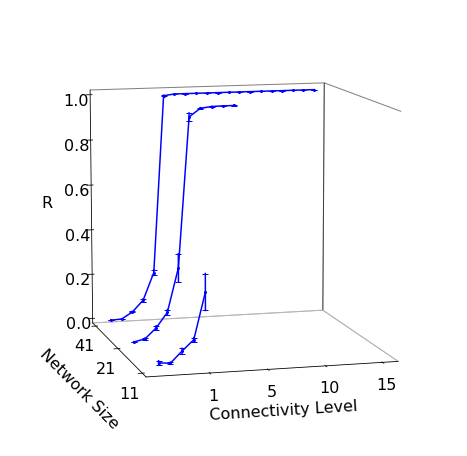

In [3]:
# import the libraries needed for plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib import rcParams
rcParams['font.size'] = 16

# define the size of the figure
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

# read the data of each simulation from the files 
Data41Cell = "/home/jesus/41Cell_VCIR.npy"
Data21Cell = "/home/jesus/21Cell_VCIR.npy"
Data11Cell = "/home/jesus/11Cell_VCIR.npy"

labels =[] 
ysticks = np.arange(1,4)

# define the axis for each network size
X1 = np.arange(1, 21, 1)
Y1 = np.arange(3, 4, 1)
X1, Y1 = np.meshgrid(X1, Y1)

X2 = np.arange(1, 11, 1)
Y2 = np.arange(2, 3, 1)
X2, Y2 = np.meshgrid(X2, Y2)

X3 = np.arange(1, 6, 1)
Y3 = np.arange(1, 2, 1)
X3, Y3 = np.meshgrid(X3, Y3)

Z1=np.zeros([1,20])
Z2=np.zeros([1,10])
Z3=np.zeros([1,5])

#load the data for each network size
valnp1 = np.load(Data41Cell)
valnp2 = np.load(Data21Cell)
valnp3 = np.load(Data11Cell)

# compute the mean of ten simulations for each network size
Z1[0,:] = np.mean(valnp1[:,:,0],0)
Z2[0,:] = np.mean(valnp2[:,:,0],0)
Z3[0,:] = np.mean(valnp3[:,:,0],0)

# plot three network size in a figure
ax.plot3D(X1[0,:],Y1[0,:],Z1[0,:], '-o', ms = 2, color='blue') 
ax.plot3D(X2[0,:],Y2[0,:],Z2[0,:], '-o', ms = 2, color = 'blue') 
ax.plot3D(X3[0,:],Y3[0,:],Z3[0,:], '-o', ms= 2, color = 'blue') 

# plot error bars, corresponding to standard error
err1 = np.std(valnp1, 0)/np.sqrt(valnp1.shape[0])
err2 = np.std(valnp2, 0)/np.sqrt(valnp2.shape[0])
err3 = np.std(valnp3, 0)/np.sqrt(valnp3.shape[0])

for i1 in range(X1.shape[1]):
    ax.plot3D([X1[0,i1],X1[0,i1]],[Y1[0,i1],Y1[0,i1]],[Z1[0,i1]-err1[i1,0],Z1[0,i1]+err1[i1,0]], '-_',color='blue') 

for i2 in range(X2.shape[1]):
    ax.plot3D([X2[0,i2],X2[0,i2]],[Y2[0,i2],Y2[0,i2]],[Z2[0,i2]-err2[i2,0],Z2[0,i2]+err2[i2,0]], '-_',color='blue') 

for i3 in range(X3.shape[1]):
    ax.plot3D([X3[0,i3],X3[0,i3]],[Y3[0,i3],Y3[0,i3]],[Z3[0,i3]-err3[i3,0],Z3[0,i3]+err3[i3,0]], '-_',color='blue') 


# give the format to the plot 

ax.set_zlim(0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(6))

ax.set_ylabel("Network Size", labelpad=15)
ax.set_zlabel("R", labelpad=15)
ax.set_xlabel("Connectivity Level", labelpad=10)
locator = matplotlib.ticker.MaxNLocator(nbins=5)
ax.xaxis.set_major_locator(locator)
plt.yticks(ysticks, labels)
ax.set_yticklabels(['11','21','41'])
ax.set_xticklabels(['1','5','10','15','20'])


ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


view_1 = (10, -105)  #(25, -135)
view_2 = (25, -115)  #(25, -45)
init_view = view_1
ax.view_init(*init_view)

plt.show()


